https://github.com/linetonthat/Real_estate_Taipei_regression/blob/master/1_Problem_description_and_EDA.ipynb  
nearest

# 1. preparing

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_notebooks/taipei_housing_price/Taipei_sindan_housing.csv')

# 2. EDA

각 컬럼에 대한 설명은 아래와 같으며 모든 필드는 X4를 제외하고는 실수 타입이다.

X1: 주택 거래 날짜를 실수로 제공한다. 소수점 부분은 달을 나타낸다. 예를 들어 2013.250이라면 2013년 3월임을 나타낸다 (0.250 = 3/12)  
X2: 주택 나이 (년수)  
X3: 가장 가까운 지하철역까지의 거리 (미터)  
X4: 주택 근방 걸어갈 수 있는 거리내 편의점 수  
X5: 주택 위치의 위도 (latitude)  
X6: 주택 위치의 경도 (longitude)  
Y: 주택 평당 가격  

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,Y
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      414 non-null    float64
 1   X2      414 non-null    float64
 2   X3      414 non-null    float64
 3   X4      414 non-null    int64  
 4   X5      414 non-null    float64
 5   X6      414 non-null    float64
 6   Y       414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


범주형 데이터 없이 모두 연속형 데이터이며, 결측치도 없다.

In [6]:
df.describe()

,X1,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


feature 들의 mean과 std가 다양하여, 가중치에 치우침이 없으려면 scaling 필요할 것 같다.

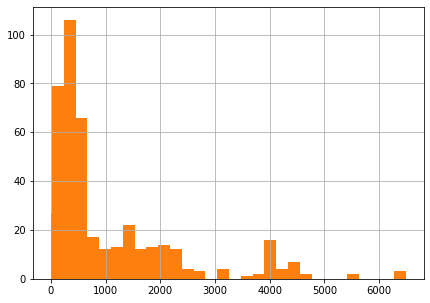

In [7]:
fig = df.iloc[:,1].hist(bins = 30, xlabelsize=10, ylabelsize=10, figsize = (7,5))
fig = df.iloc[:,2].hist(bins = 30, xlabelsize=10, ylabelsize=10, figsize = (7,5))

In [8]:
columns = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearst station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

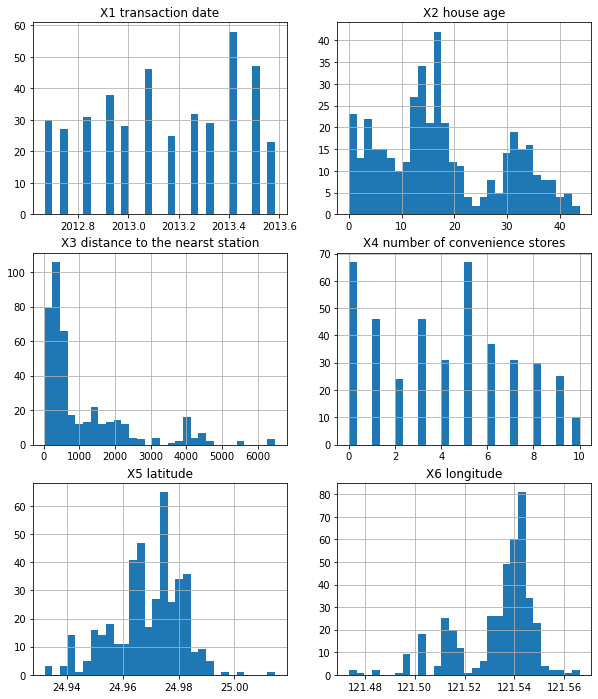

In [9]:
for i in range(len(df.columns[:-1])):
    plt.subplot(len(df.columns[:-1])//2, 2, i+1 )
    fig = df.iloc[:,i].hist(bins = 30, xlabelsize=10, ylabelsize=10, figsize = (10,12))
    plt.title(columns[i])
 

- house age varies from 0 to 43 years, with 3 peaks : 12-18 years, 0-6 years, 30-36 years
- Most houses are located within 1 km of the nearst station.

Text(0.5, 1.0, 'Y House Price per Unit Area')

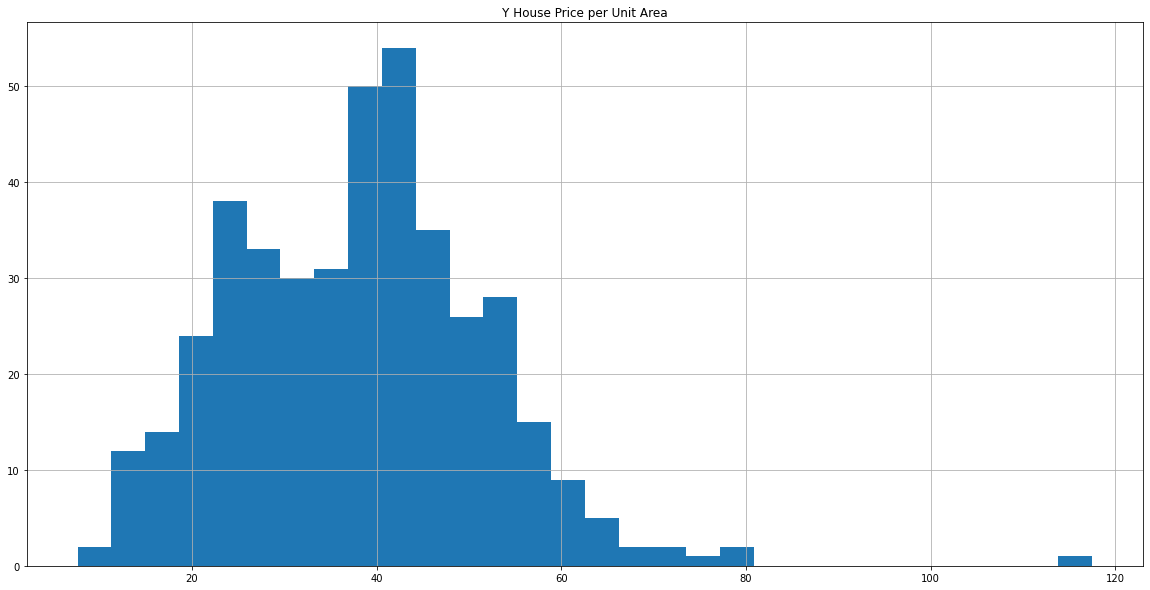

In [10]:
# 연속형 변수들의 분포를 보자
fig = df[['Y']].hist(bins = 30, xlabelsize=10, ylabelsize=10, figsize = (20,10))
plt.title('Y House Price per Unit Area')

약간 outlier가 있지만 그래도 대체적으로 normal distribution과 가까운 모습

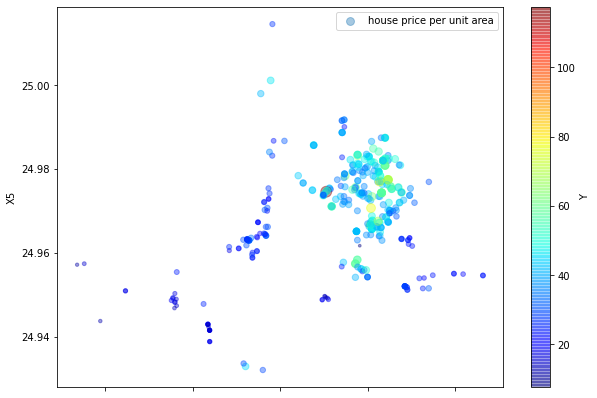

In [11]:
# 지역적 분포보기 (위도, 경도 정보를 이용하여)

df.plot(kind = 'scatter', x = 'X6', y= 'X5', s = df['Y'], label = 'house price per unit area',
        c = 'Y', cmap=plt.get_cmap("jet"), colorbar=True, alpha = 0.4, figsize=(10, 7))
plt.legend()
plt.show()

남서쪽이 비교적 가격이 저렴하고 북동쪽의 가격이 비교적 높은 것으로 보임  
batch geo website를 활용하면 지표를 가지고 지도를 만들 수 있다고 한다.

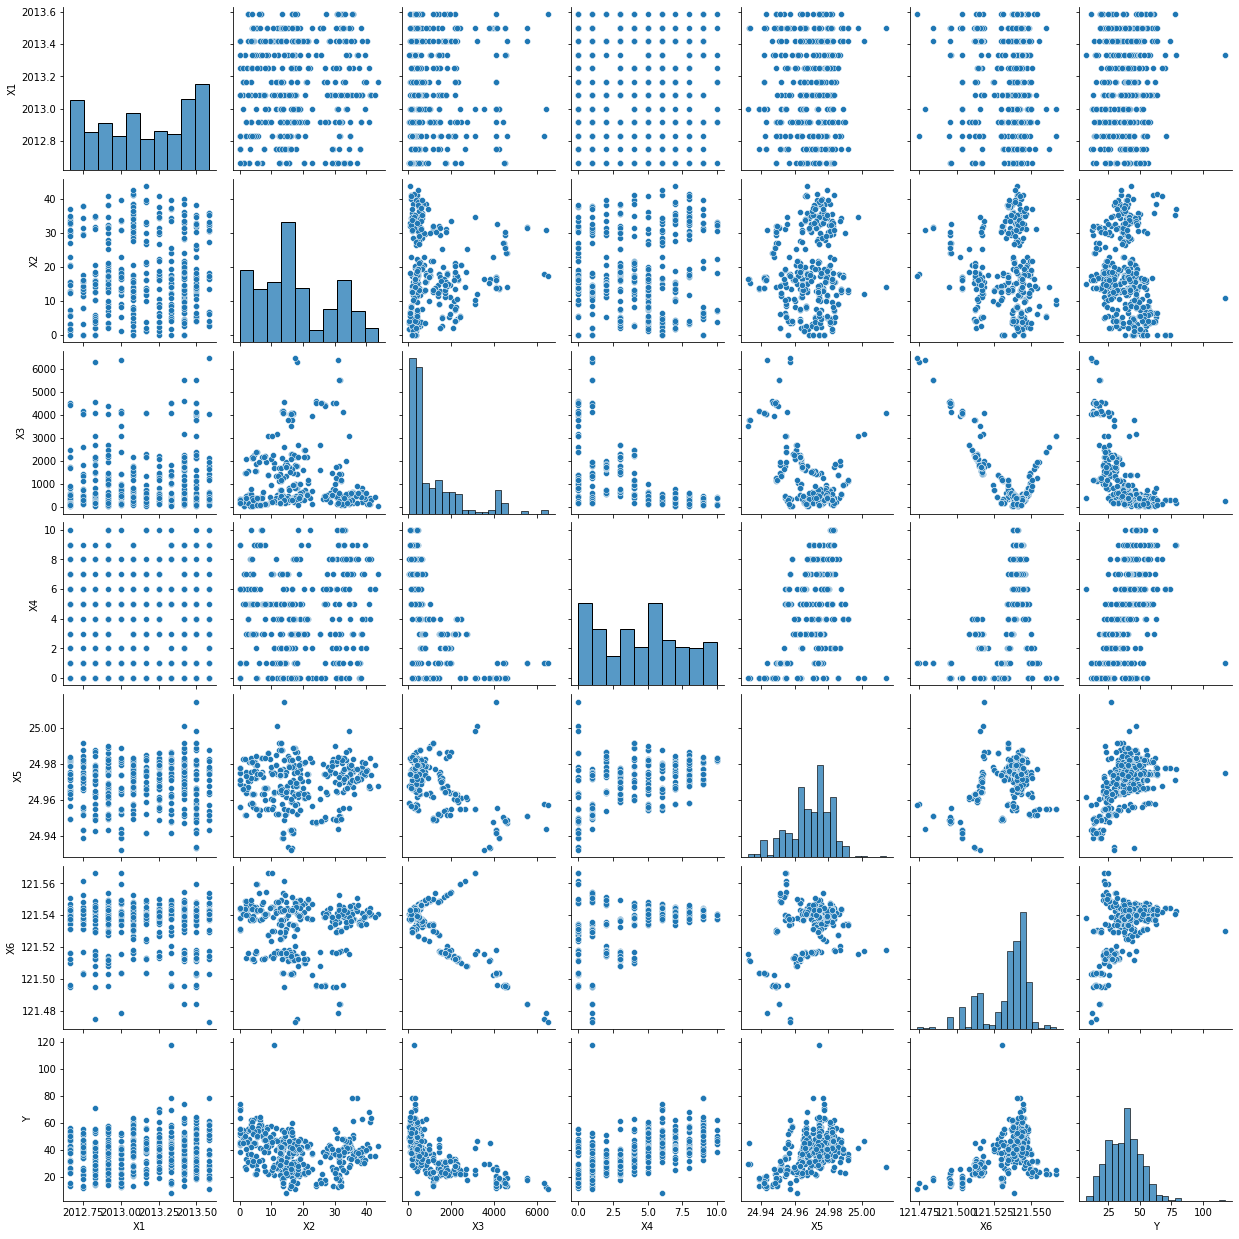

In [12]:
#outlier가 있는지 확인
sns.pairplot(df)

label에서 1케이스가 매우 튀는 이상치인 것으로 보인다. 이것을 빼는 것이 더 나을 수도 

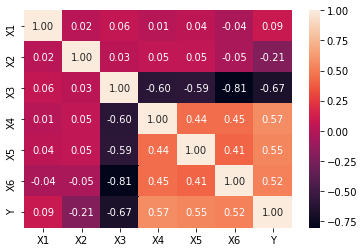

In [13]:
# correlation
corr= df.corr()
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values,
           annot=True, fmt = ".2f")
plt.show()

X3,X4,X5,X6이 상대적으로 높은 상관관계를 보이는 것 같다.
X3 은 지하철역과의 거리. 당연히 가까울수록 비쌀 것이기 때문에 음의 상관관계를 보인다.
X4는 주변 편의점 갯수. 아무래도 편의점 갯수가 많다는 것은 변두리 보다 도심에 가까울 것으로 보인다.
X5, X6은 위도와 경도. 북동쪽 지역의 평당 가격이 더 높은 것으로 보였던 것과 일맥상통한다. 서울의 '강남'처럼 이곳도 특별히 더 부촌인 지역인 것 같다.

근데 x feature 간의 높은 상관관계도 보여서 다중공선성 문제가 없을지 우려된다.
특히 X3 역과의 거리 feature는 X4,X5,X6과 높은 음의 상관관계를 보인다. 

# 3. modeling

In [51]:

# import libraries
import pandas as pd
import warnings
from numpy import mean
from numpy import std
from matplotlib import pyplot

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# insert libraries for the required regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

In [52]:
# create a dict of standard models to evaluate {name:object}
def get_models(models=dict()):
    # linear models
    models['lr'] = LinearRegression()
    models['svr'] = SVR(kernel = 'rbf')
    models['dt'] = DecisionTreeRegressor()
    models['rf'] = RandomForestRegressor()
    return models

In [53]:
# create a feature preparation pipeline for a model
def make_pipeline(model):
    steps = list()
    # standardization
    steps.append(('standardize', StandardScaler()))
    # normalization
    steps.append(('normalize', MinMaxScaler()))
    # the model
    steps.append(('model', model))
    # create pipeline
    pipeline = Pipeline(steps=steps)
    return pipeline

In [54]:
# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
    # create the pipeline
    pipeline = make_pipeline(model)
    # evaluate model
    scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
    return scores

In [55]:
# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric):
    scores = None
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            scores = evaluate_model(X, y, model, folds, metric)
    except:
        scores = None
    return scores

In [56]:
# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='accuracy'):
    results = dict()
    for name, model in models.items():
        # evaluate the model
        scores = robust_evaluate_model(X, y, model, folds, metric)
        # show process
        if scores is not None:
            # store a result
            results[name] = scores
            mean_score, std_score = mean(scores), std(scores)
            print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
        else:
            print('>%s: error' % name)
    return results

In [57]:
# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
    # check for no results
    if len(results) == 0:
        print('no results')
        return
    # determine how many results to summarize  
    n = min(top_n, len(results))
    # create a list of (name, mean(scores)) tuples
    mean_scores = [(k,mean(v)) for k,v in results.items()]
    # sort tuples by mean score
    mean_scores = sorted(mean_scores, key=lambda x: x[1])
    # reverse for descending order (e.g. for metric)
    if maximize:
        mean_scores = list(reversed(mean_scores))
    # retrieve the top n for summarization
    names = [x[0] for x in mean_scores[:n]]
    scores = [results[x[0]] for x in mean_scores[:n]]
    # print the top n
    print()
    for i in range(n):
        name = names[i]
        mean_score, std_score = mean(results[name]), std(results[name])
        print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
	
    # boxplot for the top n
    pyplot.boxplot(scores, labels=names)
    _, labels = pyplot.xticks()
    pyplot.setp(labels, rotation=90)
    pyplot.savefig('spotcheck.png')

>lr: -79.171 (+/-43.892)
>svr: -80.763 (+/-46.244)
>dt: -94.447 (+/-46.545)
>rf: -58.799 (+/-38.358)

Rank=1, Name=rf, Score=-58.799 (+/- 38.358)
Rank=2, Name=lr, Score=-79.171 (+/- 43.892)
Rank=3, Name=svr, Score=-80.763 (+/- 46.244)
Rank=4, Name=dt, Score=-94.447 (+/- 46.545)


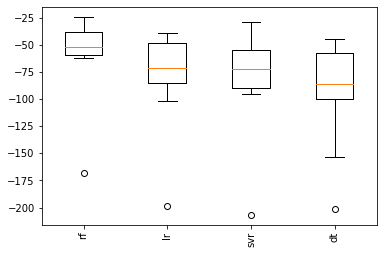

In [58]:
# split X and y
X = df.drop(['Y'], axis=1)
y = df['Y']

# get model list
models = get_models()

# evaluate models with 'neg_mean_squared_error' metric
results = evaluate_models(X, y, models, metric='neg_mean_squared_error')

# summarize results
summarize_results(results)

>lr: 0.582 (+/-0.133)
>svr: 0.576 (+/-0.139)
>dt: 0.456 (+/-0.359)
>rf: 0.692 (+/-0.124)

Rank=1, Name=rf, Score=0.692 (+/- 0.124)
Rank=2, Name=lr, Score=0.582 (+/- 0.133)
Rank=3, Name=svr, Score=0.576 (+/- 0.139)
Rank=4, Name=dt, Score=0.456 (+/- 0.359)


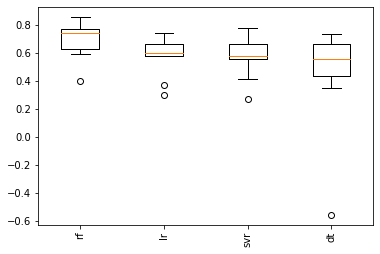

In [60]:
models = get_models()

#evaluate models with 'r2' metric
results = evaluate_models(X, y, models, metric='r2')

# summarize results
summarize_results(results)

전반적으로 random forest 알고리즘이 가장 좋은 성능을 보인것 같다. 더욱 성능을 높이기 위해 random forest 모델을 fine tuning 해보자

# Fine tuning the model

전반적으로 random forest 모델의 general 성능이 좋아 보인다.
이 random forest 모델을 바탕으로 보다 좋은 예측력을 얻기 위해 fine tuning 하려고 한다.
[random forest hyper parameter tuning 전략](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)을 바탕으로 접근해보자.
1. Random Hyperparameter Grid로 대략적인 range를 줄여보자.
2. specific hyperparamter combination을 찾기 위해 세밀하게 들여다보자.

In [61]:
# data preprocessing
# 1. train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [63]:
# 2. normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
mms_X = MinMaxScaler(feature_range=(0,1))
X_train = mms_X.fit_transform(X_train)

In [64]:
X_test = ss_X.fit_transform(X_test)
X_test = mms_X.fit_transform(X_test)

In [66]:
# baseline
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(regressor.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [67]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [68]:
# Define a function for model evaluation using cross validation
def evaluate_model_cross_validation(name, model, X_train, y_train, folds = 10):

    from sklearn.model_selection import cross_val_score
 
    # Cross Validation Regression MAE
    metric='neg_mean_absolute_error'
    scores = cross_val_score(regressor, X_train, y_train, scoring=metric, cv=folds, n_jobs=-1)
    mean_score, std_score = np.mean(scores), np.std(scores)
    print('>%s - training - MAE: %.3f (+/-%.3f)' % (name, mean_score, std_score))
    
    
    # Cross Validation Regression MSE
    metric='neg_mean_squared_error'
    scores = cross_val_score(regressor, X_train, y_train, scoring=metric, cv=folds, n_jobs=-1)
    mean_score, std_score = np.mean(scores), np.std(scores)
    print('>%s - training - MSE: %.3f (+/-%.3f)' % (name, mean_score, std_score))
    
    # Cross Validation Regression R^2
    metric='r2'
    scores = cross_val_score(regressor, X_train, y_train, scoring=metric, cv=folds, n_jobs=-1)
    mean_score, std_score = np.mean(scores), np.std(scores)
    print('>%s - training - R^2: %.3f (+/-%.3f)' % (name, mean_score, std_score))

In [69]:
# Define a function for model evaluation using a test set
def evaluate_model_test_set(name, model, y_test, y_predicted):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    print('>%s - test - MAE: %.3f' % (name, mean_absolute_error(y_test, y_predicted)))
    print('>%s - test - MSE: %.3f' % (name, mean_squared_error(y_test, y_predicted)))
    print('>%s - test - R^2: %.3f' % (name, r2_score(y_test, y_predicted)))

In [70]:
# Evaluate the baseline model
evaluate_model_cross_validation("RF_baseline", regressor, X_train, y_train, 10)

>RF_baseline - training - MAE: -4.972 (+/-1.027)
>RF_baseline - training - MSE: -60.210 (+/-59.011)
>RF_baseline - training - R^2: 0.705 (+/-0.123)


In [71]:
evaluate_model_test_set("RF_baseline", regressor, y_test, y_pred)

>RF_baseline - test - MAE: 5.573
>RF_baseline - test - MSE: 71.878
>RF_baseline - test - R^2: 0.578


Random Search Cross Validation

In [72]:
# Define the random grid

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [74]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [75]:
# First create the base model to tune 
regressor = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = regressor,
                               param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42,
                               n_jobs = -1)

In [76]:
# Fit the random search model (This might take a while)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [77]:
# print the best parameters
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [78]:
# Fitting Random forest Model to the dataset using the best parameters after random search
rf_r = RandomForestRegressor(bootstrap = True,
                                  max_depth = 110,
                                  max_features ='sqrt',
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  n_estimators = 1000)

rf_r.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_r.predict(X_test)

In [79]:
# evaluate model after random grid search
evaluate_model_cross_validation("RF_random", rf_r, X_train, y_train, 10)

>RF_random - training - MAE: -4.909 (+/-0.907)
>RF_random - training - MSE: -61.441 (+/-59.911)
>RF_random - training - R^2: 0.713 (+/-0.118)


In [80]:
evaluate_model_test_set("RF_random", rf_r, y_test, y_pred)


>RF_random - test - MAE: 5.020
>RF_random - test - MSE: 56.856
>RF_random - test - R^2: 0.666


Grid Search with Cross Validation

In [89]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [800, 900, 1000, 1100, 1200]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [100, 110, 120]
# Minimum number of samples required to split a node
min_samples_split = [2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [90]:
# First create the base model to tune 
regressor = RandomForestRegressor()

In [91]:
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           cv = 3, n_jobs = -1, verbose = 2)

In [93]:
# Fit the grid search model (This might take a while)
grid_search = grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.6min finished


In [94]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 900}

In [95]:
# Fitting Random forest Model to the dataset using the best parameters
rf_g = RandomForestRegressor(bootstrap = True,
                                  max_depth = 120,
                                  max_features ='sqrt',
                                  min_samples_leaf = 1,
                                  min_samples_split = 3,
                                  n_estimators = 900)

rf_g.fit(X_train, y_train)


# Predicting the Test set results
y_pred = rf_g.predict(X_test)

In [96]:

# evaluate model after grid search
evaluate_model_cross_validation("RF_grid_search", rf_g, X_train, y_train, 10)

>RF_grid_search - training - MAE: -4.924 (+/-0.940)
>RF_grid_search - training - MSE: -60.816 (+/-59.976)
>RF_grid_search - training - R^2: 0.704 (+/-0.126)


In [97]:
evaluate_model_test_set("RF_grid_search", rf_g, y_test, y_pred)


>RF_grid_search - test - MAE: 4.993
>RF_grid_search - test - MSE: 55.792
>RF_grid_search - test - R^2: 0.673


grid search best_parameter가 약간 더 높은 예측력을 보였다.

Further analysis needed
1. outlier 제거하면 예측력이 더 올라갈까?
2. 전처리에서 feature clustering하면 더 예측력이 올라갈까?
3. 
